<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/SOL_ejer_Multivariable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejercicio Regresión Lineal Multivariable



#### Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline

#### Datos
El siguiente conjunto de datos contiene la tensión arterial sistólica (mmHg) (variable dependiente a predecir), la edad (años) y el peso (libras, 1 libra = 0.39 Kg) (mmHg) (variables independientes o predictoras)


In [2]:
# X1 = systolic blood pressure; X2 = age in years, X3 = weight in pounds
blood_pressure_data = np.array([
    [132, 52, 173],
    [143, 59, 184],
    [153, 67, 194],
    [162, 73, 211],
    [154, 64, 196],
    [168, 74, 220],
    [137, 54, 188],
    [149, 61, 188],
    [159, 65, 207],
    [128, 46, 167],
    [166, 72, 217]
])
m = blood_pressure_data.shape[0]

# setup X matrix from input data (second and third column - first column is replaced with 1s)
X = np.matrix(np.column_stack((np.ones(m), blood_pressure_data[:, 1:3])))
print('X: \n')
print(X)

X: 

[[  1.  52. 173.]
 [  1.  59. 184.]
 [  1.  67. 194.]
 [  1.  73. 211.]
 [  1.  64. 196.]
 [  1.  74. 220.]
 [  1.  54. 188.]
 [  1.  61. 188.]
 [  1.  65. 207.]
 [  1.  46. 167.]
 [  1.  72. 217.]]


In [3]:
# Now setup vector holding 'labels' (ground-truth data for systolic blood pressure) from input (first column)
y = np.matrix(blood_pressure_data[:, 0]).T
print('y: \n')
print(y)

y: 

[[132]
 [143]
 [153]
 [162]
 [154]
 [168]
 [137]
 [149]
 [159]
 [128]
 [166]]


#### compute regression coefficients

In [4]:
betaHat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('coefficients: \n')
print(betaHat)

coefficients: 

[[30.99410295]
 [ 0.86141469]
 [ 0.3348592 ]]


#### Plotting and visualization

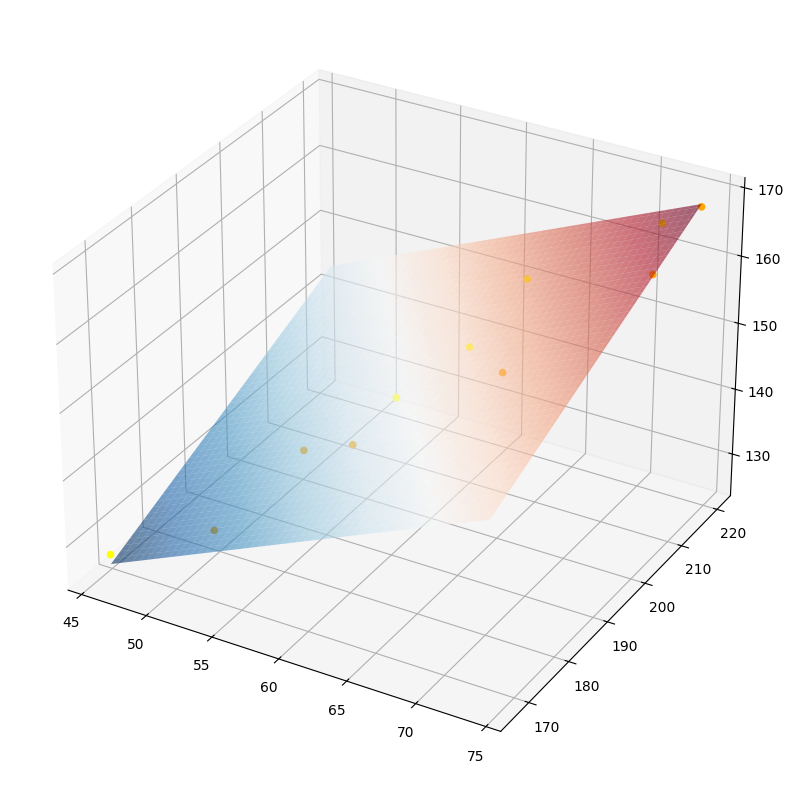

In [5]:
# Create 3D plot
xx1, xx2 = np.meshgrid(np.linspace(X[:, 1].min(), X[:, 1].max(), 100), np.linspace(X[:, 2].min(), X[:, 2].max(), 100))

# plot hyperplane
Z = betaHat.item(0) + betaHat.item(1) * xx1 + betaHat.item(2) * xx2

# create 3D Axis for plot
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(projection='3d')

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# residuals
resid = y - np.matmul(X, betaHat)
#print('residuals y - X*betaHat: \n')
#print(resid)

X2 = np.asarray(X[:, 1])
X3 = np.asarray(X[:, 2])
y_arr = np.asarray(y)

ax.scatter(X2[resid >= 0], X3[resid >= 0], y_arr[resid >= 0], c='yellow', alpha=1.0, facecolor='white')
ax.scatter(X2[resid < 0], X3[resid < 0], y_arr[resid < 0], c='orange', alpha=1.0)

plt.show()

In [6]:
X.shape

(11, 3)

In [22]:
# Cálculo de la función de coste.
def computeCost(x, y, theta):

    m = len(x)
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost

In [21]:
def vector_gradient_descent(X, y, theta, alpha, iterations,epsilon=1e-5):

    cost_anterior = computeCost(X, y, theta)
    convergencia = False
    m= len(X)
    for i in range(iterations):
        hypothesis = X.dot(theta)
        error = hypothesis-y
        gradient = X.T.dot(error)/m
        theta = theta - alpha*gradient
        cost_actual = computeCost(X, y, theta)
        if(abs(cost_actual -cost_anterior)< epsilon):
          convergencia = True
          break
        cost_anterior = cost_actual
    if(convergencia == True):
      print(f"Convergencia alcanzada en {i} iteraciones")
      print(f"coste último {cost_actual}")
      return theta
    else:
      print(f"Convergencia NO alcanzada en {i} iteraciones")
    return theta

In [35]:
# Número de variables.
n = np.shape(X)[1]-1
theta = np.matrix(np.zeros((n+1, 1)))
#theta = np.matrix(-np.random.rand(n+1, 1))
X.shape, y.shape, theta.shape


((11, 3), (11, 1), (3, 1))

In [36]:
iterations = 100000
alpha = 0.0000001
epsilon = 10e-6

In [37]:
theta

matrix([[0.],
        [0.],
        [0.]])

In [38]:
computeCost(X, y, theta)

np.float64(11348.045454545454)

In [39]:
theta= vector_gradient_descent(X, y,theta, alpha,iterations,epsilon)

Convergencia alcanzada en 1907 iteraciones
coste último 3.845456734392302


In [40]:
theta

matrix([[0.00356044],
        [0.22479237],
        [0.6971398 ]])

In [19]:
computeCost(X, y, theta)

np.float64(3.631476783108292)

In [20]:
computeCost(X,y,betaHat)

np.float64(1.9542192174703659)

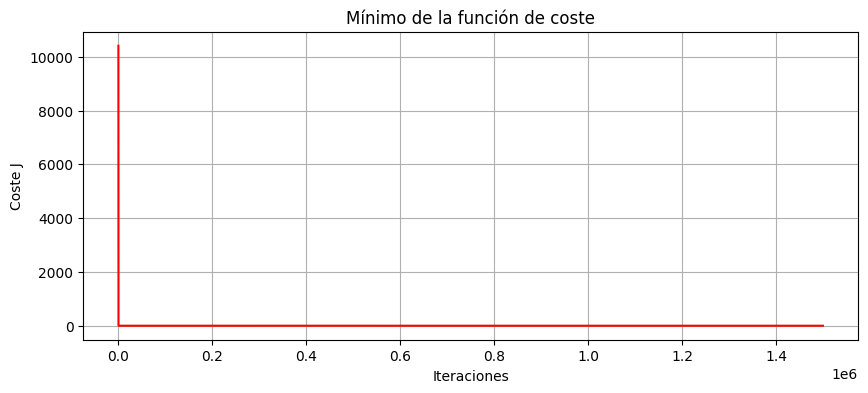

In [ ]:
plt.figure(figsize=(10, 4))
plt.xlabel('Iteraciones')
plt.ylabel('Coste J')
plt.title('Mínimo de la función de coste')
plt.grid()
ejex = np.arange(iter+1)
plt.plot(ejex, J_vals, 'r')

In [ ]:
theta

matrix([[0.15916867],
        [0.39972446],
        [0.64031571]])

In [ ]:
computeCost(X, y, theta)

3.582336767922867

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X[:,1:3], y, train_size = 0.7, test_size = 0.3, random_state = 0 )

In [ ]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(7, 2)
(4, 2)
(7, 1)
(4, 1)


In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


In [ ]:
lr=LinearRegression().fit(X_train,y_train)

In [ ]:
print(lr.intercept_)

[29.58493103]


In [ ]:
print(lr.coef_)

[[0.95479698 0.3097771 ]]


In [ ]:
import pandas as pd

In [ ]:
y_pred = lr.predict(np.asarray(X_test))

In [ ]:
y_pred.T


array([[151.40824955, 125.23836801, 153.65308628, 165.55194451]])

In [ ]:
y_test

array([[154],
       [128],
       [153],
       [166]])

In [ ]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y)

    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m

    return J

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    """
    cost_history = [0] * iterations

    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history

In [ ]:
X

array([[  1.,  52., 173.],
       [  1.,  59., 184.],
       [  1.,  67., 194.],
       [  1.,  73., 211.],
       [  1.,  64., 196.],
       [  1.,  74., 220.],
       [  1.,  54., 188.],
       [  1.,  61., 188.],
       [  1.,  65., 207.],
       [  1.,  46., 167.],
       [  1.,  72., 217.]])

In [ ]:
y

matrix([[132],
        [143],
        [153],
        [162],
        [154],
        [168],
        [137],
        [149],
        [159],
        [128],
        [166]])

In [ ]:
theta = np.array([0, 0,0])
iterations = 150000
alpha = 0.00001
X = np.array(X)
y = np.array(y).flatten()
(t, c) = gradient_descent(X,y,theta,alpha, iterations)



In [ ]:
print (t)

[0.15916868 0.39972446 0.64031571]


In [ ]:
cost_function(X, y, t)

3.5823367676652325